## Import the required packages

In [200]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

## Load the LabsCorePopulatedTable

In [201]:
data_LabsCorePopulatedTable=pd.read_csv("/home/admin/Desktop/100000-Patients/LabsCorePopulatedTable.txt",sep='\t',nrows=999999)
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000


In [202]:
data_LabsCorePopulatedTable.shape

(999999, 6)

In [203]:
data_LabsCorePopulatedTable.size

5999994

In [204]:
data_LabsCorePopulatedTable.dtypes

PatientID       object
AdmissionID      int64
LabName         object
LabValue       float64
LabUnits        object
LabDateTime     object
dtype: object

In [205]:
data_LabsCorePopulatedTable.columns

Index(['PatientID', 'AdmissionID', 'LabName', 'LabValue', 'LabUnits',
       'LabDateTime'],
      dtype='object')

In [206]:
data_LabsCorePopulatedTable.index

RangeIndex(start=0, stop=999999, step=1)

In [207]:
data_LabsCorePopulatedTable.count()

PatientID      999999
AdmissionID    999999
LabName        999999
LabValue       999999
LabUnits       999999
LabDateTime    999999
dtype: int64

In [208]:
data_LabsCorePopulatedTable.duplicated().sum()

0

In [209]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PatientID    999999 non-null  object 
 1   AdmissionID  999999 non-null  int64  
 2   LabName      999999 non-null  object 
 3   LabValue     999999 non-null  float64
 4   LabUnits     999999 non-null  object 
 5   LabDateTime  999999 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 45.8+ MB


In [210]:
data_LabsCorePopulatedTable.describe()

,AdmissionID,LabValue
count,999999.000000,999999.000000
mean,2.596473,35.017404
std,1.465706,58.668567
min,1.000000,0.000000
25%,1.000000,3.300000
50%,2.000000,10.600000
75%,3.000000,37.800000
max,9.000000,450.000000


In [211]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,0,0,0,0,0,0


## Checking for the outliers

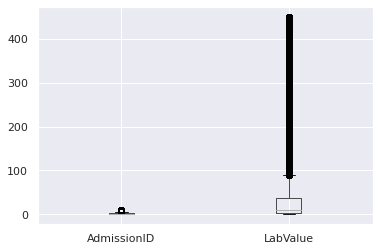

In [212]:
data_LabsCorePopulatedTable.boxplot();

In [213]:
X=data_LabsCorePopulatedTable.AdmissionID
X.head(5)

0    1
1    1
2    1
3    1
4    1
Name: AdmissionID, dtype: int64

Text(0.5, 0, 'AdmissionID')

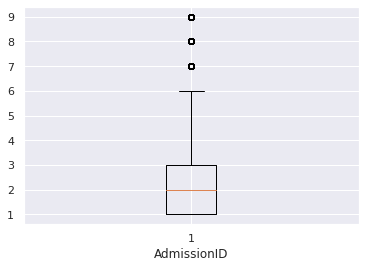

In [214]:
plt.boxplot(data_LabsCorePopulatedTable['AdmissionID']);
plt.xlabel('AdmissionID')

In [215]:
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()

0    True
1    True
2    True
3    True
4    True
Name: AdmissionID, dtype: bool

In [216]:
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")

957244/999999 remaining data points


Text(0.5, 0, 'AdmissionID')

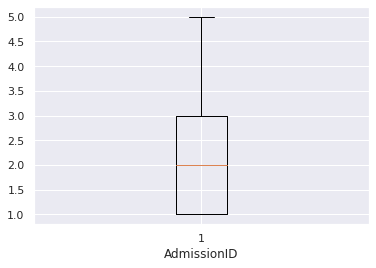

In [217]:
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")

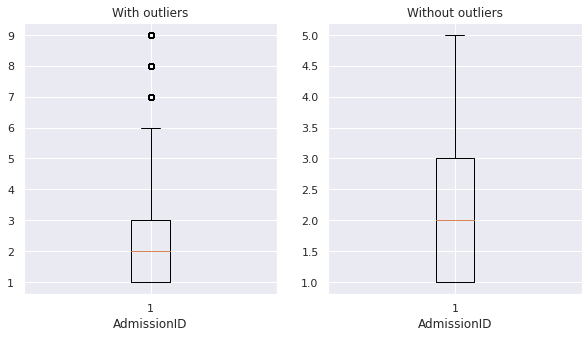

In [218]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

In [219]:
data_LabsCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime,clean_AdmissionID
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000,1.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000,1.0
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000,1.0
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000,1.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000,1.0


Text(0.5, 0, 'LabValue')

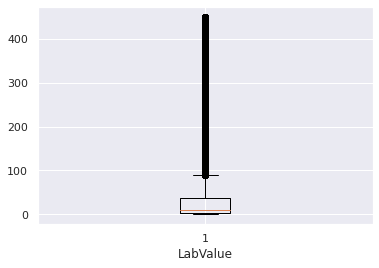

In [220]:
plt.boxplot(data_LabsCorePopulatedTable['LabValue']);
plt.xlabel('LabValue')

In [221]:
X=data_LabsCorePopulatedTable.LabValue
X.head(10)

0     40.0
1      0.9
2    134.2
3     15.0
4      2.8
5      0.5
6      9.2
7      1.0
8      7.0
9      3.0
Name: LabValue, dtype: float64

In [222]:
remove_outliers_LabValue=X.between(X.quantile(0.45),X.quantile(0.9))
remove_outliers_LabValue.head()

0     True
1    False
2    False
3     True
4    False
Name: LabValue, dtype: bool

In [223]:
print(str(X[remove_outliers_LabValue].size)+"/"+str(X.size) + " remaining data points")

451854/999999 remaining data points


Text(0.5, 0, 'LabValue')

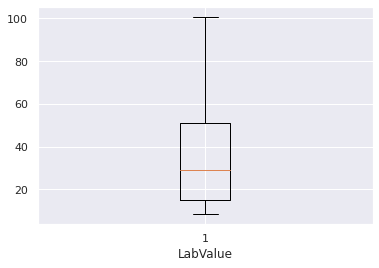

In [224]:
plt.boxplot(X[remove_outliers_LabValue])
plt.xlabel("LabValue")

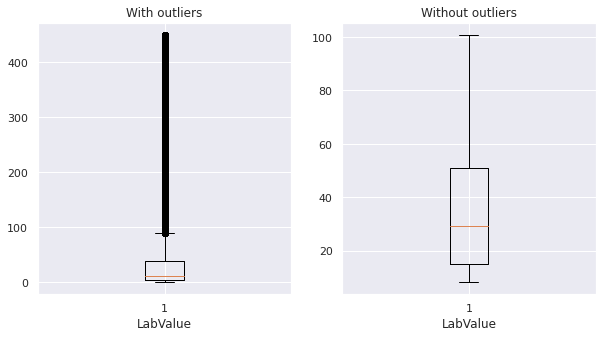

In [225]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("LabValue")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("LabValue")
axis[1].boxplot(X[remove_outliers_LabValue]);

In [226]:
data_LabsCorePopulatedTable['clean_LabValue']=X[remove_outliers_LabValue]

In [227]:
data_LabsCorePopulatedTable.drop(labels=['AdmissionID','LabValue'],axis=1,inplace=True)

In [228]:
data_LabsCorePopulatedTable.head()

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALT/SGPT,U/L,1974-01-11 21:10:51.930000000,1.0,40.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: MONOCYTES,k/cumm,1974-01-11 03:14:30.127000000,1.0,NaN
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: GLUCOSE,mg/dL,1974-01-11 13:57:06.970000000,1.0,NaN
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: RDW,%,1974-01-11 02:10:43.437000000,1.0,15.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALBUMIN,gm/dL,1974-01-11 18:50:32.400000000,1.0,NaN


In [229]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,0,0,0,0,42755,548145


In [230]:
data_LabsCorePopulatedTable.shape

(999999, 6)

In [231]:
data_LabsCorePopulatedTable.size

5999994

In [232]:
data_LabsCorePopulatedTable.dropna(axis=0,inplace=True)

In [233]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_AdmissionID,clean_LabValue
0,0,0,0,0,0,0


In [234]:
data_LabsCorePopulatedTable.shape

(432511, 6)

In [235]:
data_LabsCorePopulatedTable.size

2595066

In [236]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432511 entries, 0 to 999996
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PatientID          432511 non-null  object 
 1   LabName            432511 non-null  object 
 2   LabUnits           432511 non-null  object 
 3   LabDateTime        432511 non-null  object 
 4   clean_AdmissionID  432511 non-null  float64
 5   clean_LabValue     432511 non-null  float64
dtypes: float64(2), object(4)
memory usage: 23.1+ MB


In [237]:
data_AdmissionID=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['PatientID'].count()
data_AdmissionID

clean_AdmissionID
1.0    126397
2.0    120253
3.0     93181
4.0     61020
5.0     31660
Name: PatientID, dtype: int64

Text(0.5, 1.0, 'Count of Patient ID with respect to Admission ID')

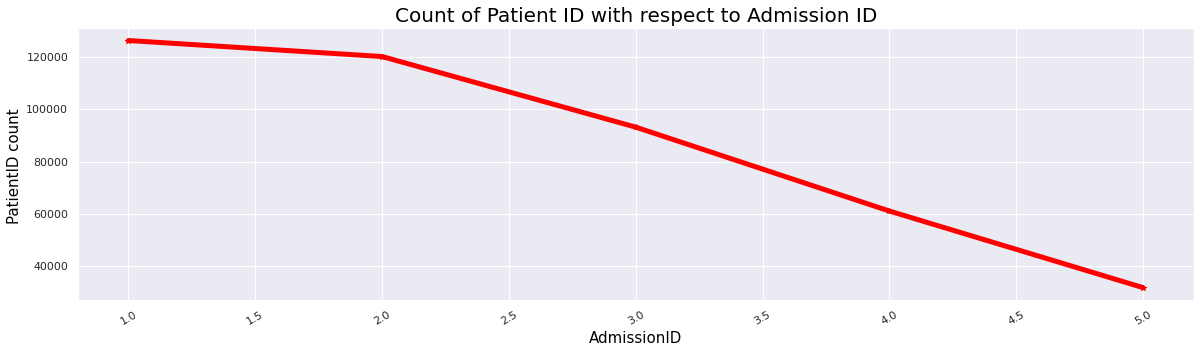

In [238]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_AdmissionID,color='red',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("AdmissionID",fontsize=15,color='black')
plt.ylabel("PatientID count ",fontsize=15,color='black')
plt.title("Count of Patient ID with respect to Admission ID",fontdict={'fontsize':20,'color':'black'})

In [239]:
data_LabName=data_LabsCorePopulatedTable.groupby(['LabName'])['clean_AdmissionID'].count()
data_LabName

LabName
CBC: ABSOLUTE LYMPHOCYTES       27404
CBC: ABSOLUTE NEUTROPHILS       27352
CBC: HEMATOCRIT                 27367
CBC: HEMOGLOBIN                 27330
CBC: MCH                        27379
CBC: MCHC                       27282
CBC: MEAN CORPUSCULAR VOLUME    27410
CBC: NEUTROPHILS                 7584
CBC: RDW                        27431
CBC: WHITE BLOOD CELL COUNT     11360
METABOLIC: ALK PHOS             15073
METABOLIC: ALT/SGPT             27424
METABOLIC: ANION GAP            17733
METABOLIC: AST/SGOT             27366
METABOLIC: BUN                  23787
METABOLIC: CALCIUM              20449
METABOLIC: CARBON DIOXIDE       27245
METABOLIC: CHLORIDE             11926
METABOLIC: GLUCOSE              13987
METABOLIC: TOTAL PROTEIN         9622
Name: clean_AdmissionID, dtype: int64

Text(0.5, 1.0, 'Count of Admission ID with respect to Lab Name ')

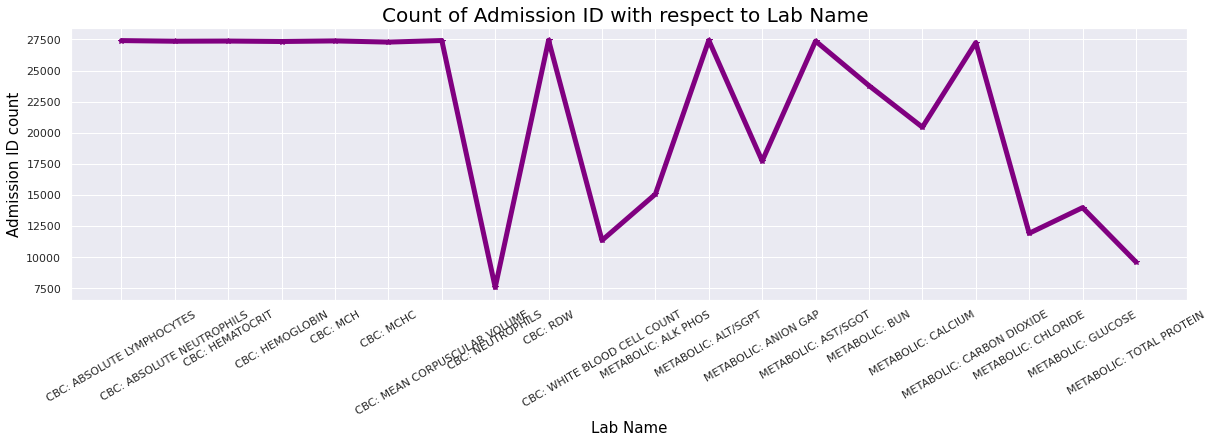

In [240]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabName,color='purple',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Lab Name",fontsize=15,color='black')
plt.ylabel("Admission ID count",fontsize=15,color='black')
plt.title("Count of Admission ID with respect to Lab Name ",fontdict={'fontsize':20,'color':'black'})

In [241]:
data_LabValue=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['clean_LabValue'].count()
data_LabValue

clean_AdmissionID
1.0    126397
2.0    120253
3.0     93181
4.0     61020
5.0     31660
Name: clean_LabValue, dtype: int64

Text(0.5, 1.0, 'Count of Lab Value with respect to Admission ID ')

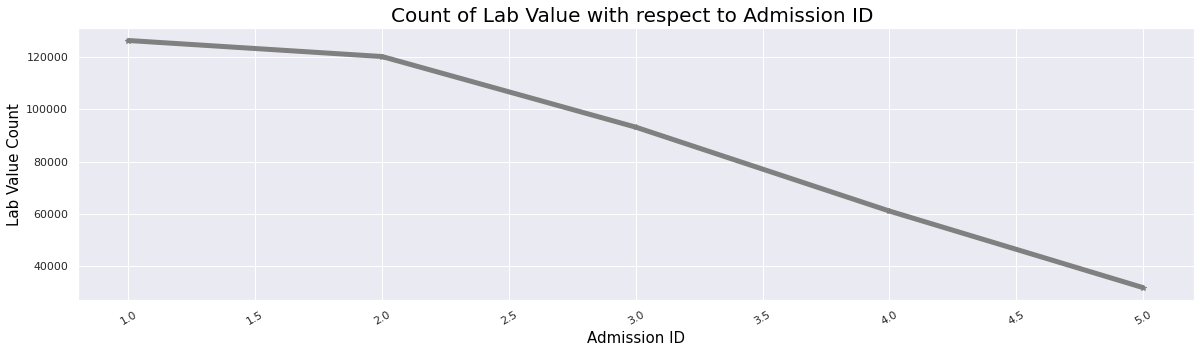

In [242]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabValue,color='grey',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Lab Value Count",fontsize=15,color='black')
plt.title("Count of Lab Value with respect to Admission ID ",fontdict={'fontsize':20,'color':'black'})

In [243]:
data_LabUnits=data_LabsCorePopulatedTable.groupby(['clean_AdmissionID'])['LabUnits'].count()
data_LabUnits

clean_AdmissionID
1.0    126397
2.0    120253
3.0     93181
4.0     61020
5.0     31660
Name: LabUnits, dtype: int64

Text(0.5, 1.0, 'Count of Lab Units with respect to Admission ID ')

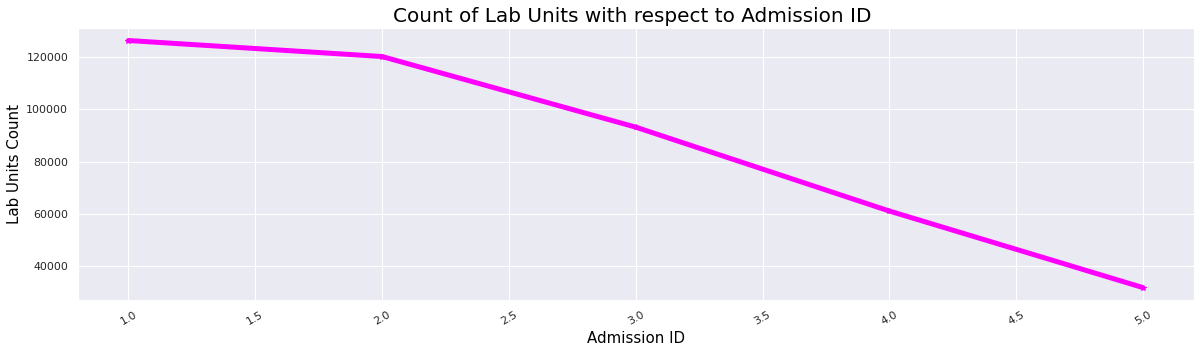

In [244]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabUnits,color='magenta',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Admission ID",fontsize=15,color='black')
plt.ylabel("Lab Units Count",fontsize=15,color='black')
plt.title("Count of Lab Units with respect to Admission ID ",fontdict={'fontsize':20,'color':'black'})

In [245]:
data_LabUnits1=data_LabsCorePopulatedTable.groupby(['LabUnits'])['clean_AdmissionID'].count()
data_LabUnits1

LabUnits
%         109554
U/L        69863
fl         27410
g/dl       27282
gm/dL       9622
gm/dl      27330
k/cumm     18944
mg/dL      58223
mmol/L     56904
pg         27379
Name: clean_AdmissionID, dtype: int64

Text(0.5, 1.0, 'Count of Admission ID with respect to Lab Units ')

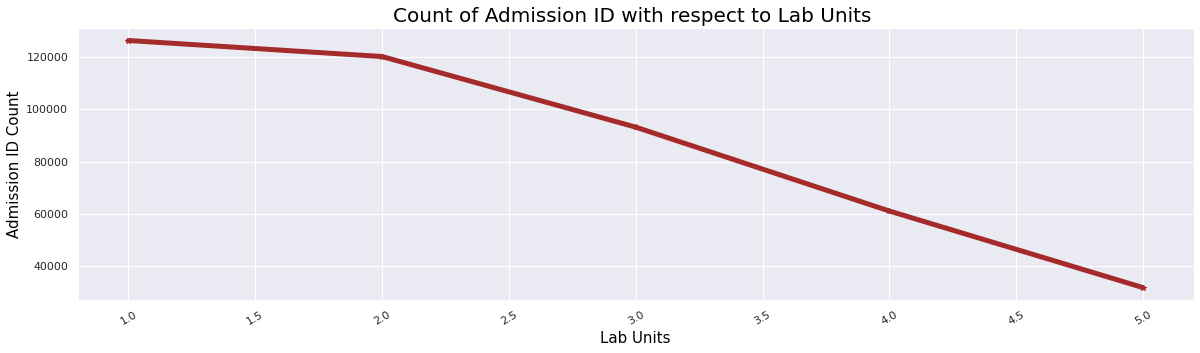

In [246]:
plt.figure(figsize=(20,5))
splot= plt.plot(data_LabValue,color='brown',lw=5,marker='*')
plt.xticks(rotation=30)
plt.xlabel("Lab Units",fontsize=15,color='black')
plt.ylabel("Admission ID Count",fontsize=15,color='black')
plt.title("Count of Admission ID with respect to Lab Units ",fontdict={'fontsize':20,'color':'black'})